<a href="https://colab.research.google.com/github/zharfanw/zhongshan_dsp_python/blob/main/9_Application_of_DFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>9. Application of DFT</h1>

In [2]:
from os import confstr
import numpy as np
import matplotlib.pyplot as plt

## 9.0 Necessary Program For this topic

In [3]:
# Generate 30 random integers between 0 and 99 (inclusive)
random_sequence = np.random.randint(0, 20, 40)

# Plot the sequence
# plt.stem(random_sequence, linefmt='b-', markerfmt='bo', basefmt=" ")
# plt.title("Random Discrete Sequence")
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.show()

In [4]:
# Define the length of the sequence
def triangle_sequence(N):
  # Create the triangle sequence
  triangle_sequence = np.zeros(N)
  for i in range(N):
      triangle_sequence[i] = i if i <= N // 2 else N - 1 - i
  return triangle_sequence

# # Plot the sequence
# plt.stem(triangle_sequence(5), linefmt='b-', markerfmt='bo', basefmt=" ")
# plt.title("Triangle Discrete Sequence (7 Points)")
# plt.xlabel("Index")
# plt.ylabel("Value")
# plt.show()

# 9.1 Convolution with DTFT

P

In [5]:
# Function of Linear convolution with DFT
def linear_convolution_dft(x, h):
    # Get length of Both Signal x, and h
    L = len(x)
    M = len(h)
    N = L + M - 1  # Add Length for zero padding

    # Zero-padding
    x_padded = np.pad(x, (0, N - L), mode='constant')
    h_padded = np.pad(h, (0, N - M), mode='constant')

    # DFT for both signal x,h --> X,H
    X = np.fft.fft(x_padded)
    H = np.fft.fft(h_padded)

    # Multiply Both X,H -> Y
    Y = X * H

    # Inverse DFT Y -> y
    y = np.fft.ifft(Y)

    return np.real(y)


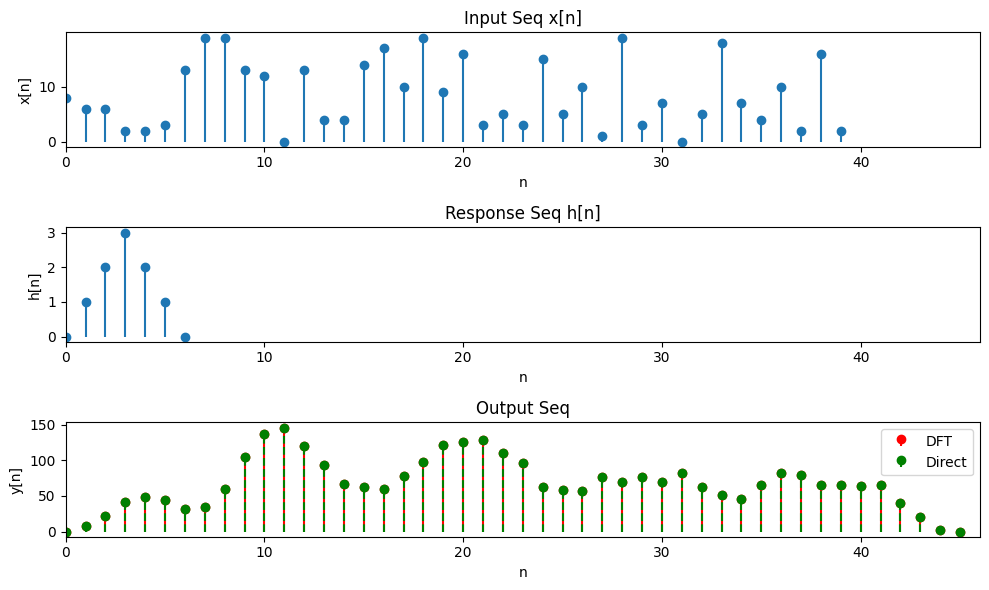

In [6]:
# Sample of Sequence Signal
# x = [1, 2, 3, 4]  # Input Seq
# h = [1, -1, 1]    # Response Seq
x = np.random.randint(0, 20, 40)
h = triangle_sequence(7)

# Linear Convolution by Numpy Library
y_direct = np.convolve(x, h)

# Linear Convolution by DFT
y_dft = linear_convolution_dft(x, h)

# Plot hasil
plt.figure(figsize=(10, 6))

# Plot Input Seq
plt.subplot(3, 1, 1)
plt.stem(x, basefmt=" ")
plt.title("Input Seq x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.xlim(0,len(y_direct))

# Plot Impulse Response
plt.subplot(3, 1, 2)
plt.stem(h, basefmt=" ")
plt.title("Response Seq h[n]")
plt.xlabel("n")
plt.ylabel("h[n]")
plt.xlim(0,len(y_direct))

# Plot Output Sequence
plt.subplot(3, 1, 3)
plt.stem(y_dft, linefmt='r-', markerfmt='ro', basefmt=" ", label="DFT")
plt.stem(y_direct, linefmt='g--', markerfmt='go', basefmt=" ", label="Direct")
plt.title("Output Seq")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.xlim(0,len(y_direct))
plt.legend()

plt.tight_layout()
plt.show()


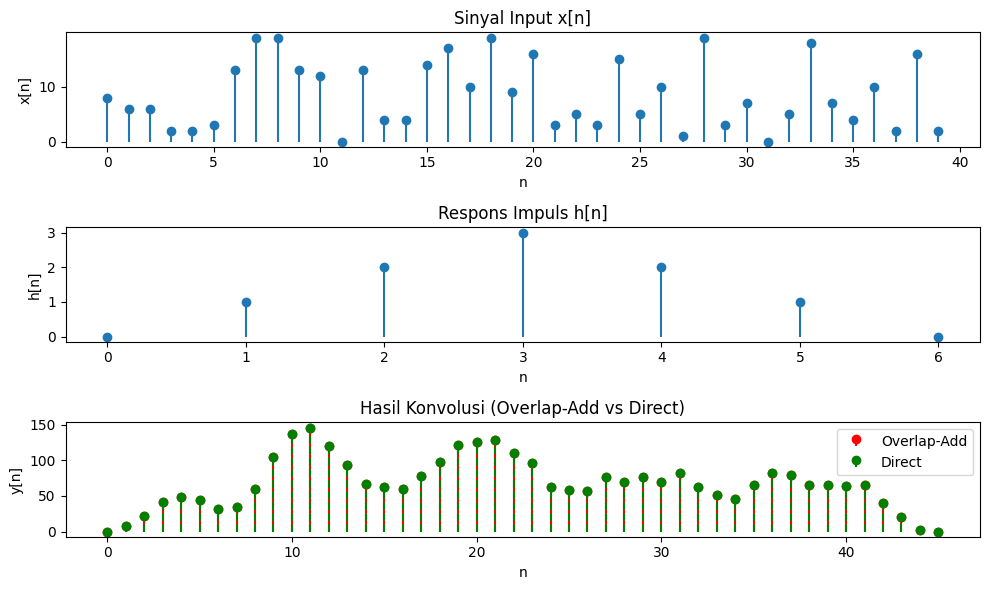

In [7]:
# Perbaikan logika untuk Overlap-Add Convolution
def overlap_add_convolution_fixed_v2(x, h):
    L = len(h)  # Panjang respons impuls
    block_size = L  # Panjang blok input
    N = 2**int(np.ceil(np.log2(L + block_size - 1)))  # Panjang DFT (optimal untuk FFT)

    # Zero-pad h ke panjang N
    H = np.fft.fft(np.pad(h, (0, N - L), 'constant'))

    # Hasil akhir
    result_length = len(x) + len(h) - 1
    result = np.zeros(result_length)

    # Proses blok sinyal input
    for i in range(0, len(x), block_size):
        block = x[i : i + block_size]  # Ambil blok sinyal
        block_padded = np.pad(block, (0, N - len(block)), 'constant')  # Zero-pad blok

        # DFT, perkalian di frekuensi, dan IDFT
        X = np.fft.fft(block_padded)
        Y = np.fft.ifft(X * H)

        # Tambahkan hasil ke sinyal keluaran (Overlap-Add)
        start = i
        end = min(i + N, result_length)
        result[start:end] += np.real(Y[: end - start])

    return result

# Konvolusi menggunakan metode Overlap-Add yang diperbaiki
y_overlap_add_fixed_v2 = overlap_add_convolution_fixed_v2(x, h)

# Plot hasil
plt.figure(figsize=(10, 6))

# Plot sinyal masukan
plt.subplot(3, 1, 1)
plt.stem(x, basefmt=" ")
plt.title("Sinyal Input x[n]")
plt.xlabel("n")
plt.ylabel("x[n]")

# Plot respons impuls
plt.subplot(3, 1, 2)
plt.stem(h, basefmt=" ")
plt.title("Respons Impuls h[n]")
plt.xlabel("n")
plt.ylabel("h[n]")

# Plot hasil konvolusi
plt.subplot(3, 1, 3)
plt.stem(y_overlap_add_fixed_v2, linefmt='r-', markerfmt='ro', basefmt=" ", label="Overlap-Add")
plt.stem(y_direct, linefmt='g--', markerfmt='go', basefmt=" ", label="Direct")
plt.title("Hasil Konvolusi (Overlap-Add vs Direct)")
plt.xlabel("n")
plt.ylabel("y[n]")
plt.legend()

plt.tight_layout()
plt.show()


# 9.2 Spectral Estimation


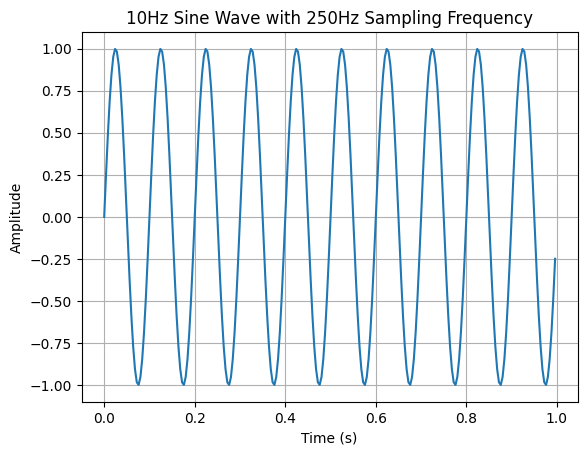

In [8]:
# prompt: create 10Hz sinewave with 250Hz fs

import numpy as np
import matplotlib.pyplot as plt

# Parameters
f_s = 250  # Sampling frequency (Hz)
f_0 = 10   # Frequency of sine wave (Hz)
duration = 1  # Duration of the signal (seconds)

# Time vector
t = np.arange(0, duration, 1/f_s)

# Generate sine wave
sine_wave = np.sin(2 * np.pi * f_0 * t)

# Plot the sine wave
plt.plot(t, sine_wave)
plt.title('10Hz Sine Wave with 250Hz Sampling Frequency')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

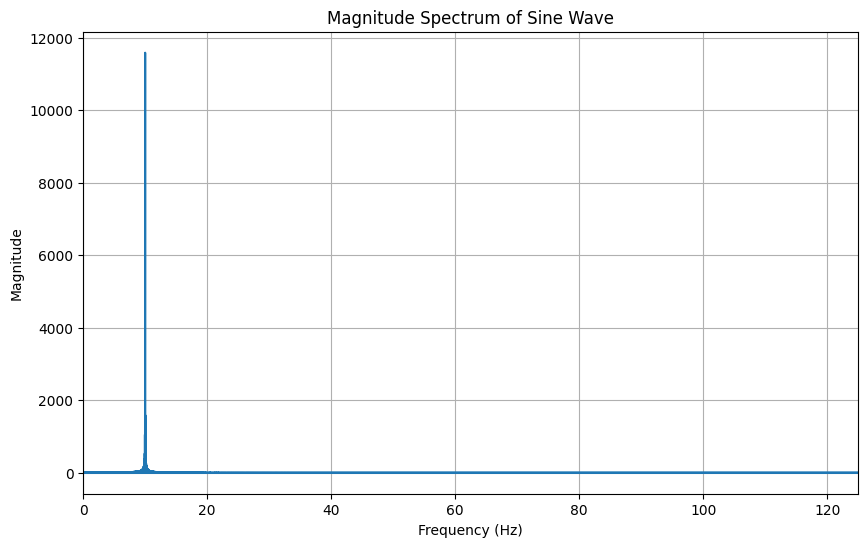

In [11]:
# prompt: spectral analysis dengan Nfft = 2*nextpow2(N)

import numpy as np
import matplotlib.pyplot as plt

# ... (your existing code)

# 9.2 Spectral Estimation

# Parameters
f_s = 250  # Sampling frequency (Hz)
f_0 = 10   # Frequency of sine wave (Hz)
duration = 100  # Duration of the signal (seconds)

# Time vector
t = np.arange(0, duration, 1/f_s)

# Generate sine wave
sine_wave = np.sin(2 * np.pi * f_0 * t)

# Calculate the DFT
N = len(sine_wave)
Nfft = 2**int(np.ceil(np.log2(N))) #Nfft = 2*nextpow2(N)
X = np.fft.fft(sine_wave, Nfft)

# Calculate the frequencies corresponding to the DFT coefficients
f = np.fft.fftfreq(Nfft, 1/f_s)

# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(X)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(f, magnitude_spectrum)
plt.title('Magnitude Spectrum of Sine Wave')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, f_s/2)  # Display only positive frequencies
plt.grid(True)
plt.show()

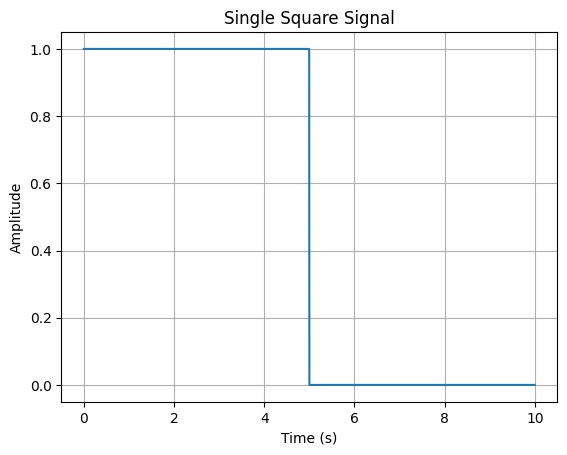

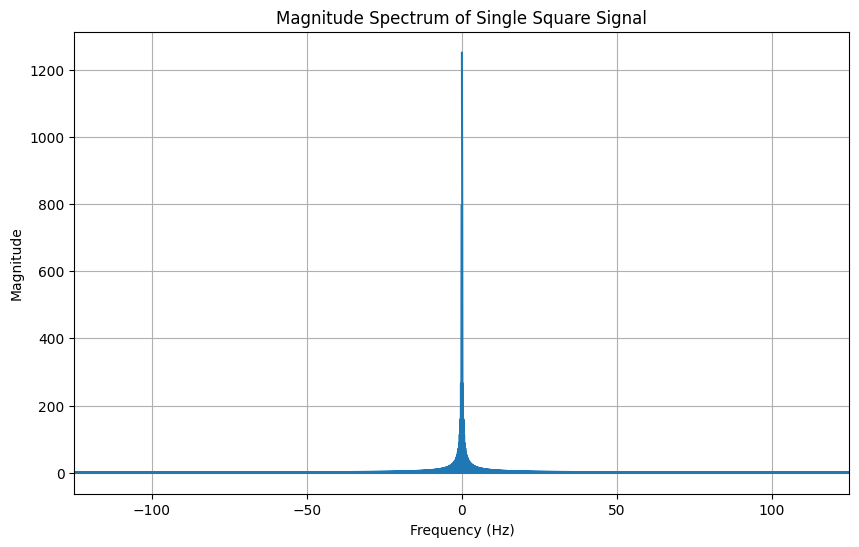

In [16]:
# prompt: create fft with single square signal, but not periodic

import numpy as np
import matplotlib.pyplot as plt

# Generate a single square signal (non-periodic)
def square_signal(duration, f_s, f_0):
    t = np.arange(0, duration, 1/f_s)
    signal = np.zeros_like(t)
    signal[t < duration / 2] = 1  # Square pulse for first half of the duration
    return t, signal

# Parameters
f_s = 250  # Sampling frequency (Hz)
f_0 = 10  # Signal frequency (Hz) - not really relevant for a single square pulse
duration = 10  # Duration of the signal (seconds)


# Generate and plot
t, square_wave = square_signal(duration, f_s, f_0)
plt.plot(t, square_wave)
plt.title('Single Square Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Calculate FFT
N = len(square_wave)
X = np.fft.fft(square_wave)

# Calculate the frequencies corresponding to the DFT coefficients
f = np.fft.fftfreq(N, 1/f_s)

# Calculate the magnitude spectrum
magnitude_spectrum = np.abs(X)

# Plot the magnitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(f, magnitude_spectrum)
plt.title('Magnitude Spectrum of Single Square Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(-f_s/2, f_s/2)  # Display only positive frequencies
plt.grid(True)
plt.show()

# 9.3 Short-Time Fourier Transform (STFT)
